This Jupter notebook contains a shell code to compute the path integral for the harmonic oscillator. This exercise is taken from https://arxiv.org/pdf/hep-lat/0506036.


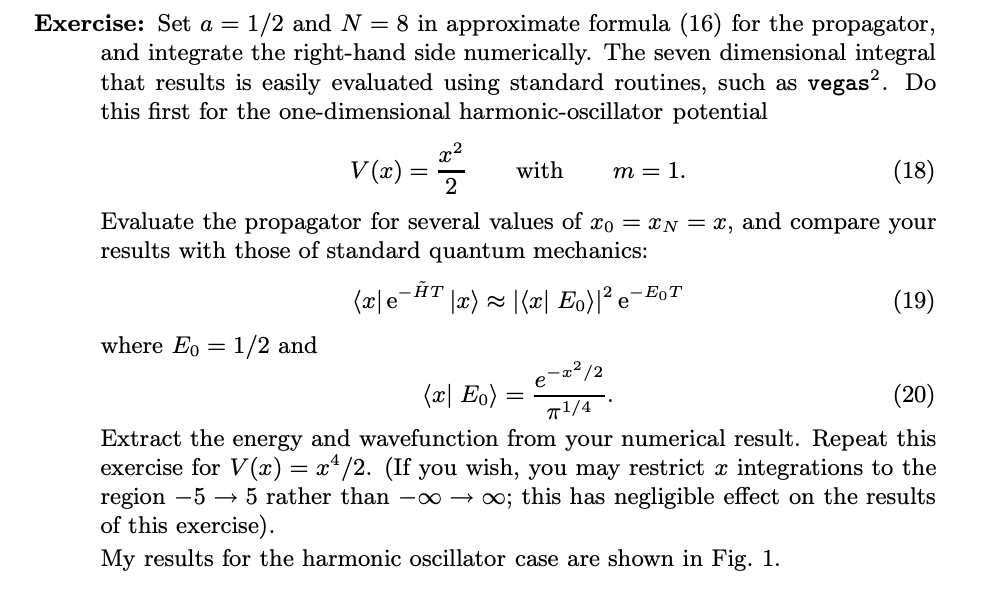

In [ ]:
""" Vegas is a package that can perform multidimensional integrals. The package decription can be found here: https://pypi.org/project/vegas/
    If you are unable to pip install the package, you can clone it from the following github: https://github.com/gplepage/vegas"""

#This section of code will compute the schrodinger propagator for the harmonic oscillator
import numpy as np
import scipy as sc
import vegas 
import matplotlib.pyplot as plt

#initializing parameters 
a = 0.5
N = 8
A = 1/(2*np.pi*a)**(N/2)
T = 4
E_0 = 0.5
#Now we are ready to integrate

#We need to keep running the integration setting our endpoints
x = np.zeros(10)
prop = np.zeros(10)

for i in range(10):
    x[0] = 2*i/10 #Since we are going out to x = 2 with 10 points. Here we set the endpoints
    x[N] = 2*i/10
    def f(g):
        S = 0
        for k in range(1,N):
            x[k]=g[k-1]        
        for j in range(0,N):
            S += (1/(2*a))*((x[j+1] - x[j])**2)+a*x[j]**2/2 #This is our lattice action
        return A*np.exp(-S)
    integ = vegas.Integrator((N-1)*[[-5,5]]) #Evaluating the path integral 
    result = integ(f, nitn=10, neval=100000)
    prop[i] = result.mean
    

In [ ]:
#The above cell computes and stores the propagator in the array called prop (which you can change). From that, try getting the ground state energy and wavefunction for the Harmonic oscillator. 
#Then repeat the exercise for the anharmonic oscillator V(x) = x^4/2